This is a notebook on how to use deeplabcut (DLC) to track pupil

Let's import `pupil` first

In [1]:
%matplotlib inline
from pipeline import pupil
import datajoint as dj

Loading local settings from pipeline_config.json
Connecting donnie@10.28.0.34:3306


/usr/local/lib/python3.6/dist-packages/deeplabcut/__init__.py:22: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/pla

DLC loaded in light mode; you cannot use the labeling GUI!
DLC loaded in light mode; you cannot use the relabeling GUI!


/usr/local/lib/python3.6/dist-packages/deeplabcut/utils/visualization.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/

In [10]:
dj.ERD(pupil.TrackingMethod) + 3

# Tracking the pupil

In order to track pupil, first we have to specify which method to use by manually putting into `TrackingMethod` table. Let's first look at the table

In [13]:
pupil.TrackingMethod()

*animal_id    *session    *scan_idx    *tracking_meth
+-----------+ +---------+ +----------+ +------------+
21617         9           7            1             
 (Total: 1)

We need a key with 4 entries like:

In [7]:
key = dict(animal_id=21617, session=9, scan_idx=7, tracking_method=1) # modify the values here

For tracking method, there are 2 methods currently:
- Manual == 0
- deeplabcut == 1

Note, manual (i.e. setting `tracking_method` to 0) is now depcrecated. Only the ones that are ALREADY contoured will be able to fetch data from `ManuallyTrackedContours`. Otherwise, it will throw an error down the stream. So make sure you use 1 for automatic labeling

Now, to track it using the deeplabcut, simply call the following:

In [15]:
# pupil.Tracking.populate(key)

Once successfully populated, you can check the part tables

In [17]:
pupil.Tracking.ManualTracking()

*animal_id    *session    *scan_idx    *tracking_meth *frame_id    contour   
+-----------+ +---------+ +----------+ +------------+ +----------+ +--------+

 (Total: 0)

In [16]:
pupil.Tracking.Deeplabcut()

*animal_id    *session    *scan_idx    *tracking_meth short_vid_star cropped_x0     cropped_x1     cropped_y0     cropped_y1     added_pixels   config_path   
+-----------+ +---------+ +----------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+
21617         9           7            1              66090          650            1056           350            666            100            /mnt/lab/DeepL
 (Total: 1)

As expected, `ManualTracking` part table is empty while `Deeplabcut` part table is filled. one can check what each entry means. For detailed explanation of HOW the procedure goes, please check `DLC_workflow_detailed_explanation.ipynb`. This page is simply about how to populate tables

In [20]:
pupil.Tracking.Deeplabcut.heading

# 
animal_id            : int                          # id number
session              : smallint                     # session index for the mouse
scan_idx             : smallint                     # number of TIFF stack file
tracking_method      : tinyint unsigned             # tracking_method 0:manual 1: deeplabcut
---
short_vid_starting_index : int unsigned                 # middle frame index of the original video
cropped_x0           : smallint unsigned            # start width coord wrt original video
cropped_x1           : smallint unsigned            # end width coord wrt original video
cropped_y0           : smallint unsigned            # start height coord wrt original video
cropped_y1           : smallint unsigned            # end height coord wrt original video
added_pixels         : smallint unsigned            # number of pixels added around the cropping coords
config_path          : varchar(128)                 # path to deeplabcut config yaml

Now that we have tracked successfully, we can fit both a circle and ellipse. To do so, simply call:

In [ ]:
pupil.FittedContourNew.populate(key)

In [4]:
pupil.TrackedLabelsDeeplabcut.OriginalVideo()

*animal_id    *session    *scan_idx    *config_path   original_width original_heigh video_path    
+-----------+ +---------+ +----------+ +------------+ +------------+ +------------+ +------------+
20892         9           10           /mnt/scratch07 664            672            /mnt/scratch06
20892         10          10           /mnt/scratch07 904            850            /mnt/scratch06
 (Total: 2)

In [5]:
pupil.TrackedLabelsDeeplabcut.ShortVideo()

*animal_id    *session    *scan_idx    *config_path   starting_frame video_path    
+-----------+ +---------+ +----------+ +------------+ +------------+ +------------+
20892         9           10           /mnt/scratch07 61769          /mnt/scratch06
20892         10          10           /mnt/scratch07 69262          /mnt/scratch06
 (Total: 2)

In [6]:
pupil.TrackedLabelsDeeplabcut.CompressedCroppedVideo()

*animal_id    *session    *scan_idx    *config_path   cropped_x0     cropped_x1     cropped_y0     cropped_y1     added_pixels   video_path    
+-----------+ +---------+ +----------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+
20892         9           10           /mnt/scratch07 330            664            329            672            100            /mnt/scratch06
20892         10          10           /mnt/scratch07 433            807            548            842            100            /mnt/scratch06
 (Total: 2)

For detailed information, please refer to `DLC_workflow_detailed_explanation.ipynb`

# Fitting contour to the tracked video

Once tracked, then we can fit contour to the tracked video

In [ ]:
# pupil.FittedContourDeeplabcut().populate(key)

When fitting, both `circle` and `ellipse` are fitted

In [8]:
pupil.FittedContourDeeplabcut.Circle & key

*animal_id    *session    *scan_idx    *config_path   *frame_id    center     radius     visible_portio
+-----------+ +---------+ +----------+ +------------+ +----------+ +--------+ +--------+ +------------+
20892         10          10           /mnt/scratch07 0            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 1            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 2            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 3            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 4            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 5            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 6            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 7            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 8            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 9            =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 10           =BLOB=     nan        -3.0          
20892         10          10           /mnt/scratch07 11           =BLOB=     nan        -3.0          
   ...
 (Total: 138524)

In [9]:
pupil.FittedContourDeeplabcut.Ellipse & key

*animal_id    *session    *scan_idx    *config_path   *frame_id    center     major_radius   minor_radius   rotation_angle visible_portio
+-----------+ +---------+ +----------+ +------------+ +----------+ +--------+ +------------+ +------------+ +------------+ +------------+
20892         10          10           /mnt/scratch07 0            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 1            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 2            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 3            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 4            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 5            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 6            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 7            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 8            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 9            =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 10           =BLOB=     nan            nan            nan            -3.0          
20892         10          10           /mnt/scratch07 11           =BLOB=     nan            nan            nan            -3.0          
   ...
 (Total: 138524)

# Retreiving fitted info

In [20]:
r, center_circle = (pupil.FittedContourDeeplabcut.Circle() & key).fetch('radius', 'center', order_by='frame_id ASC')

In [21]:
major_r, minor_r, center_ellipse = (pupil.FittedContourDeeplabcut.Ellipse() & key).fetch('major_radius', 'minor_radius', 'center', order_by='frame_id ASC')

# Checking the fitted frame

If one wants to see how well DLC predicted and how well the fitting proceeded, one can easily check. First, import the following:

In [26]:
from deeplabcut.utils import auxiliaryfunctions
from pipeline.utils import DLC_tools

Specify some **toy case**, then fetch the DLC configuration as well as `CompressedCroppedVideo` information of the **toy case**

In [28]:
toy_case = dict(animal_id=20892, session=10, scan_idx=10)
shuffle, trainingsetindex = (pupil.ConfigDeeplabcut & key).fetch1(
    'shuffle', 'trainingsetindex')
cc_info = (pupil.TrackedLabelsDeeplabcut.CompressedCroppedVideo() & key).fetch1()

config = auxiliaryfunctions.read_config(cc_info['config_path'])
config['config_path'] = cc_info['config_path']
config['shuffle'] = shuffle
config['trainingsetindex'] = trainingsetindex
config['video_path'] = cc_info['video_path']

Now, we instantiate `DLC_tools.PupilFitting`. It takes `config` and `bodyparts` as parameters. If we pass `all` for `bodyparts`, we then plot every label. Otherwise, we can specify a list of bodyparts in `string` format. The available bodyparts are the following:
- 'eyelid_top'
- 'eyelid_top_right'
- 'eyelid_right' 
- 'eyelid_right_bottom'
- 'eyelid_bottom'
- 'eyelid_bottom_left'
- 'eyelid_left'
- 'eyelid_left_top'
- 'pupil_top'
- 'pupil_top_right'
- 'pupil_right'
- 'pupil_right_bottom'
- 'pupil_bottom'
- 'pupil_bottom_left'
- 'pupil_left'
- 'pupil_left_top'

Or you can also see the list by calling `config['bodyparts']`

In [29]:
pupil_fit = DLC_tools.PupilFitting(config=config, bodyparts='all')

138524


Now, we can plot one specific frame with either `circle` fitting or `ellipse` fitting

In [39]:
pupil_fit.plot_fitted_frame(frame_num=4000, fitting_method='circle')

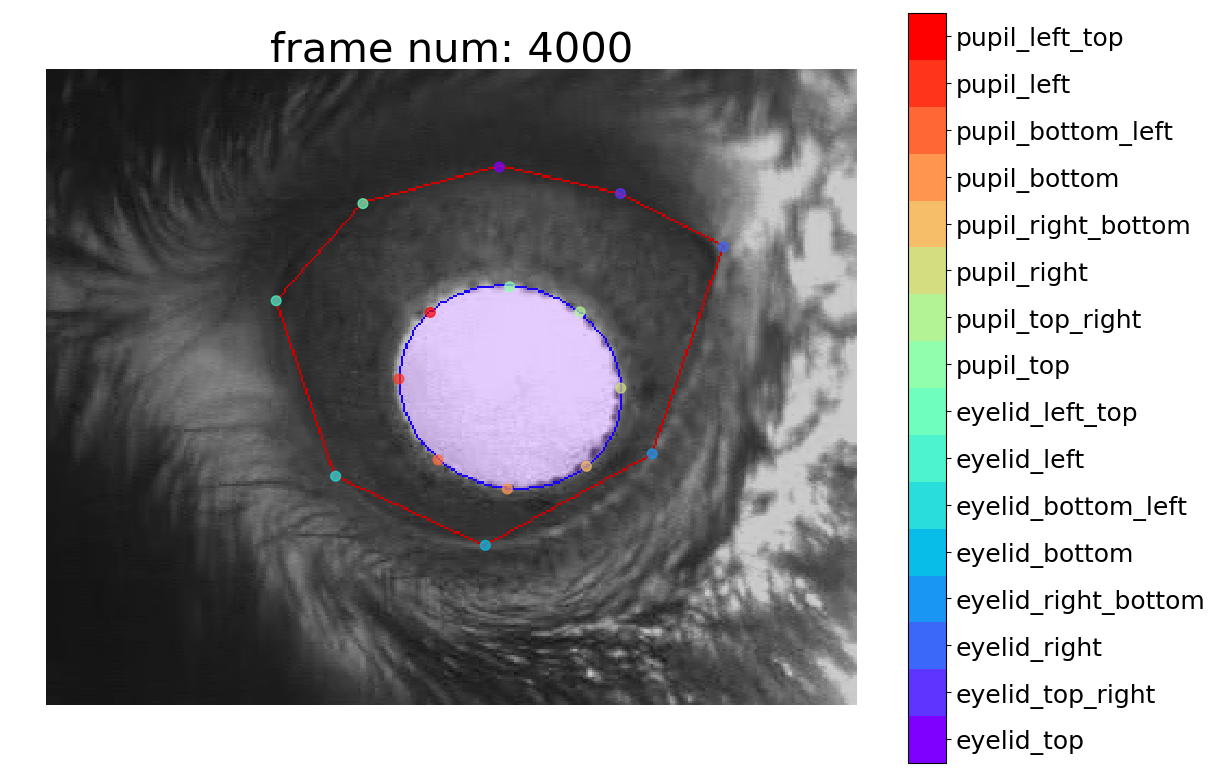

In [40]:
pupil_fit.plot_fitted_frame(frame_num=4000, fitting_method='ellipse')

Or you can plot multiple frames

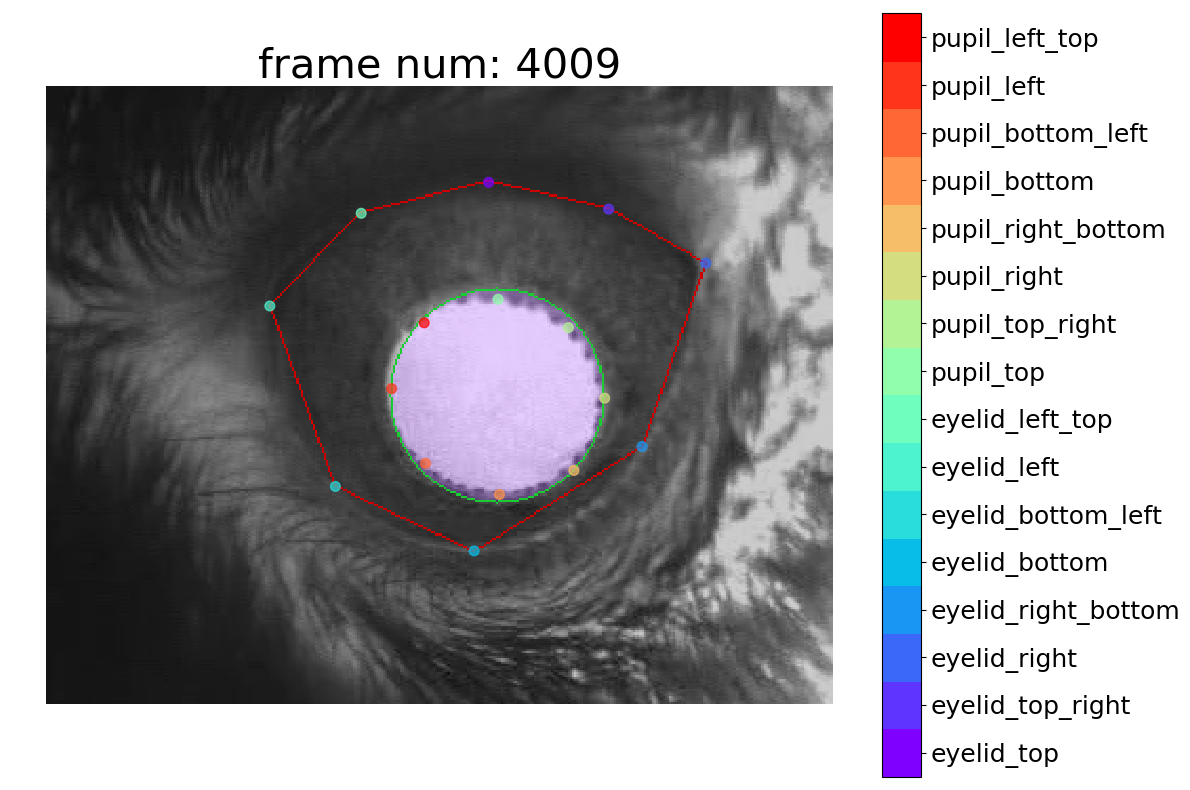

In [42]:
pupil_fit.plot_fitted_multi_frames(start=4000, end=4010, fitting_method='circle')

For more information on `PupilFitting`, please use `DLC_tools.PupilFitting??` and `DLC_tools.PlotBodyparts??`

In [47]:
# DLC_tools.PupilFitting??
# DLC_tools.PlotBodyparts??